<a href="https://colab.research.google.com/github/tlima5/deep-learning/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN


Importando Pacotes

In [ ]:
import keras
from keras.models import Model
from keras.layers import *
from keras.optimizers import *
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import csv
from sklearn.model_selection import train_test_split
from google.colab import files

Using TensorFlow backend.


In [ ]:
!ls

sample_data


In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection
!unzip test_images.zip -d test_images
!unzip train_images.zip -d train_images
!ls train_images


  inflating: test_images/58a569759348.png  
  inflating: test_images/bafc8f7940f0.png  
  inflating: test_images/a6276ef5053b.png  
  inflating: test_images/d65a606a9289.png  
  inflating: test_images/dbf67b9638cd.png  
  inflating: test_images/f5b4f7bc69e7.png  
  inflating: test_images/df9fb7e570cd.png  
  inflating: test_images/755615db51d3.png  
  inflating: test_images/43c1d80cd2b2.png  
  inflating: test_images/9f70f457f732.png  
  inflating: test_images/48c30363529b.png  
  inflating: test_images/23e7645e7e39.png  
  inflating: test_images/4ae1cf32388b.png  
  inflating: test_images/0622a0f615db.png  
  inflating: test_images/16cfea326456.png  
  inflating: test_images/087966da55c2.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/b0fc3ca722ba.png  
  inflating: test_images/aa2c125a8ab8.png  
  inflating: test_images/17bed9f69d84.png  
  inflating: test_images/408ea007f294.png  
  inflating: test_images/4e545daf0236.png  
  inflating: test_images/e1abc3

In [ ]:
n0=0
n1=0
n2=0
n3=0
n4=0
arquivo = open('train.csv')
images = csv.DictReader(arquivo)
for image in images:
  dr = int(image["diagnosis"])
  if dr==0:
    n0+=1
  if dr==1:
    n1+=1
  if dr==2:
    n2+=1
  if dr==3:
    n3+=1
  if dr==4:
    n4+=1
print("Nivel 0: "+str(n0)+"\nNivel 1: "+str(n1)+"\nNivel 2: "+str(n2)+"\nNivel 3: "+str(n3)+"\nNivel 4: "+str(n4))

Nivel 0: 1805
Nivel 1: 370
Nivel 2: 999
Nivel 3: 193
Nivel 4: 295


In [ ]:
arquivo = open('train.csv')
images = csv.DictReader(arquivo)
X=[]
y=[]
y_wight=[]
for image in images:
  aux=np.zeros(5)
  img = image["id_code"]
  dr = int(image["diagnosis"])
  img = cv2.imread('train_images/'+img+'.png',cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(640,480))
  aux[dr]=1
  y_wight.append(dr)
  X.append(img)
  y.append(aux)
print("train ok")
arquivo1 = open('test.csv')
images = csv.DictReader(arquivo1)
X_teste=[]
for image in images:
  img = image["id_code"]
  img = cv2.imread('test_images/'+img+'.png',cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(640,480))
  X_teste.append(img)

train ok


In [ ]:
X_test=np.asarray(X_teste)
y=np.asarray(y)
X=np.asarray(X)
print(y.shape)
print(X.shape)
print(y)
print(X)

(3662, 5)
(3662, 480, 640)
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 0 ... 0 0 0]
  ...
  [1 1 2 ... 1 1 1]
  [0 0 1 ... 1 2 2]
  [0 0 1 ... 1 2 2]]

 [[1 1 1 ... 2 1 1]
  [1 1 1 ... 0 1 1]
  [0 2 1 ... 1 0 2]
  ...
  [2 2 2 ... 2 1 1]
  [1 3 2 ... 1 2 2]
  [1 3 2 ... 1 2 2]]

 [[1 1 0 ... 0 1 1]
  [1 1 2 ... 0 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [2 2 3 ... 1 1 1]
  [1 1 2 ... 1 1 1]
  [1 1 0 ... 1 1 1]]

 ...

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 0 2]
  ...
  [0 0 1 ... 1 1 1]
  [1 1 0 ... 1 2 1]
  [1 1 0 ... 1 2 1]]

 [[1 1 1 ... 1 0 1]
  [1 1 1 ... 1 0 0]
  [1 1 1 ... 1 0 2]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[4 4 4 ... 4 4 3]
  [3 3 4 ... 4 4 4]
  [3 4 3 ... 3 4 4]
  ...
  [4 4 3 ... 4 5 4]
  [3 4 4 ... 3 3 3]
  [4 3 4 ... 4 3 4]]]


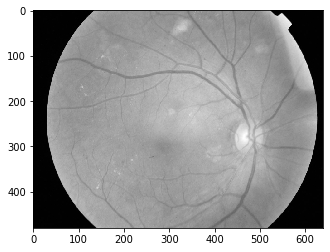

In [ ]:
plt.imshow(X[11], cmap="gray")

Apartir Daqui acabou manipulação de dados

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_val[4])
print(y_val[4])

(2929, 480, 640)
[[2 2 1 ... 2 2 1]
 [2 2 1 ... 2 2 1]
 [2 2 1 ... 2 2 1]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [1 1 0 ... 1 1 0]]
[1. 0. 0. 0. 0.]


In [ ]:
print("Antes da conversão para float32: ")
print(X_train.shape)
print(X_train[1])


X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


print("\nApós a conversão para float32:")
print(X_train.shape)
print(X_train[1])

X_train /= 255
X_val  /= 255
X_test /= 255

print("\nApós a normalização: ")
print(X_train.shape)
print(X_train[1])

#O reshape é para adequar à CNN: número de amostras (pode-se usar X_train.shape[0]), 
#dim1, dim2, número de canais (como é grayscale, é apenas 1 canal)
X_train = X_train.reshape(-1,480,640,1)
X_val = X_val.reshape(-1,480,640,1)
X_test = X_test.reshape(-1,480,640,1)

print("\nApós o reshape: ")
print(X_train.shape)
print(X_train[1])

Antes da conversão para float32: 
(2929, 480, 640)
[[4 3 4 ... 3 4 4]
 [3 4 4 ... 4 3 5]
 [3 4 4 ... 4 3 4]
 ...
 [4 3 3 ... 3 3 3]
 [4 4 4 ... 4 4 3]
 [4 4 4 ... 4 4 4]]

Após a conversão para float32:
(2929, 480, 640)
[[4. 3. 4. ... 3. 4. 4.]
 [3. 4. 4. ... 4. 3. 5.]
 [3. 4. 4. ... 4. 3. 4.]
 ...
 [4. 3. 3. ... 3. 3. 3.]
 [4. 4. 4. ... 4. 4. 3.]
 [4. 4. 4. ... 4. 4. 4.]]

Após a normalização: 
(2929, 480, 640)
[[0.01568628 0.01176471 0.01568628 ... 0.01176471 0.01568628 0.01568628]
 [0.01176471 0.01568628 0.01568628 ... 0.01568628 0.01176471 0.01960784]
 [0.01176471 0.01568628 0.01568628 ... 0.01568628 0.01176471 0.01568628]
 ...
 [0.01568628 0.01176471 0.01176471 ... 0.01176471 0.01176471 0.01176471]
 [0.01568628 0.01568628 0.01568628 ... 0.01568628 0.01568628 0.01176471]
 [0.01568628 0.01568628 0.01568628 ... 0.01568628 0.01568628 0.01568628]]

Após o reshape: 
(2929, 480, 640, 1)
[[[0.01568628]
  [0.01176471]
  [0.01568628]
  ...
  [0.01176471]
  [0.01568628]
  [0.01568628]]

 [[0

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_wight),
                                                 y_wight)

In [ ]:
print(np.unique(y_wight))
print(class_weights)

[0 1 2 3 4]
[0.40576177 1.97945946 0.73313313 3.79481865 2.48271186]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    width_shift_range= 0.2, height_shift_range= 0.2,
    rotation_range= 90,
    horizontal_flip= True, vertical_flip=True)

datagen.fit(X_train)

In [ ]:
inputs = Input((480, 640,1))

Conv = Conv2D(8, kernel_size=(3,3), strides=(1, 1), padding='same')(inputs)
Conv = Activation('relu')(Conv)
Conv = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(Conv)

Conv = Conv2D(16, kernel_size=(3,3), strides=(1, 1), padding='same')(Conv)
Conv = Activation('relu')(Conv)
Conv = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(Conv)

Conv = Conv2D(32, kernel_size=(3,3), strides=(1, 1), padding='same')(Conv)
Conv = Activation('relu')(Conv)
Conv = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(Conv)

Conv = Conv2D(64, kernel_size=(3,3), strides=(2, 2), padding='same')(Conv)
Conv = Activation('relu')(Conv)
Conv = MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')(Conv)


flat = Flatten()(Conv)
dense = Dense(32,activation = 'relu')(flat)
dense = Dense(16,activation = 'relu')(dense)
dense = Dense(5, activation = 'softmax')(dense)

model = Model(inputs, dense)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()







Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 480, 640, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 480, 640, 8)       80        
_________________________________________________________________
activation_1 (Activation)    (None, 480, 640, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 240, 320, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 240, 320, 16)      1168      
_________________________________________________________________
activation_2 (Activation)    (None, 240, 320, 16)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 120, 160, 16)    

In [ ]:
history = model.fit_generator(
          datagen.flow(X_train, y_train, batch_size=16),          
          epochs=100,
          verbose=1,
          validation_data=(X_val, y_val),
           class_weight=class_weights)

In [ ]:
uploaded = files.upload()

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=20,
          verbose=1,
          validation_data=(X_val, y_val),
          class_weight=class_weights)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2929 samples, validate on 733 samples
Epoch 1/20





2929/2929 [==============================] - 15s 5ms/step - loss: 0.9642 - acc: 0.6504 - val_loss: 0.8637 - val_acc: 0.7080
Epoch 2/20
2929/2929 [==============================] - 7s 2ms/step - loss: 0.8195 - acc: 0.7016 - val_loss: 0.8013 - val_acc: 0.7121
Epoch 3/20
2929/2929 [==============================] - 7s 2ms/step - loss: 0.7896 - acc: 0.7125 - val_loss: 0.7969 - val_acc: 0.7162
Epoch 4/20
2929/2929 [==============================] - 7s 2ms/step - loss: 0.7704 - acc: 0.7153 - val_loss: 0.7753 - val_acc: 0.7135
Epoch 5/20
2929/2929 [==============================] - 7s 2ms/step - loss: 0.7591 - acc: 0.7265 - val_loss: 0.7681 - val_acc: 0.7285
Epoch 6/20
2929/2929 [==============================] - 7s 2ms/step - loss: 0.7387 - acc: 0.7337 - val_loss: 0.7957 - val_acc: 0.7244
Epoch 7/20
2929/2929 [========================

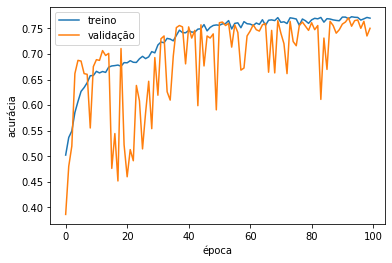

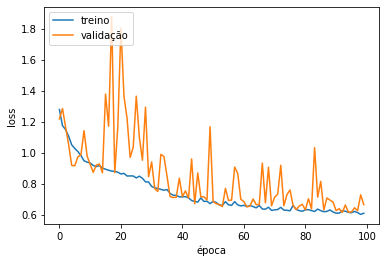

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
!ls

kaggle.json  resul.csv		    test.csv	     train.csv
model.h5     sample_data	    test_images      train_images
model.json   sample_submission.csv  test_images.zip  train_images.zip


In [ ]:
pred = model.predict(X_test)
print(pred)
np.savetxt('resul.csv', pred)

[[4.9556186e-04 1.2447998e-02 7.6420087e-01 9.5525980e-02 1.2732950e-01]
 [4.5678276e-04 1.1713948e-02 7.6738954e-01 9.4693959e-02 1.2574583e-01]
 [5.5715704e-04 1.7123168e-02 7.3293823e-01 1.0746595e-01 1.4191547e-01]
 ...
 [5.0125609e-04 1.1522922e-02 7.7357221e-01 9.1532461e-02 1.2287109e-01]
 [4.8030642e-04 1.5253805e-02 7.4157113e-01 1.0464343e-01 1.3805141e-01]
 [9.9949646e-01 2.7107116e-04 2.2841920e-04 1.4237979e-07 3.8857784e-06]]


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[343   3   5   0   0]
 [ 14  22  29   3   0]
 [ 11  16 173  12   1]
 [  2   0  22  12   0]
 [  2   7  53   3   0]]


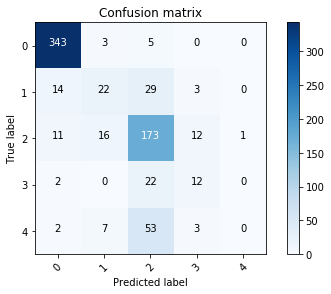

In [ ]:
from sklearn.metrics import confusion_matrix
#Plotando a matriz de confusão
y_pred =  model.predict(X_val)
class_pred = []
for pred in y_pred:
    class_number = np.argmax(pred)
    class_pred.append(class_number)
class_true = []
for pred in y_val:
    class_number = np.argmax(pred)
    class_true.append(class_number)
    
class_names=["0","1","2","3","4"]
cnf_matrix = confusion_matrix(class_true,	class_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')


In [ ]:
!ls

kaggle.json  resul.csv		    test.csv	     train.csv
model.h5     sample_data	    test_images      train_images
model.json   sample_submission.csv  test_images.zip  train_images.zip


In [ ]:
files.download("model.h5")
files.download("model.json")